# Inference only Text Models in `arcgis.learn`

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
<li><span><a href="#Transformer-Basics" data-toc-modified-id="Transformer-Basics-2">Transformer Basics</a></span></li>
<li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-3">Prerequisites</a></span></li>    
<li><span><a href="#Inference-only-models" data-toc-modified-id="Inference-only-models-4">Inference only models</a></span></li>
<ul class="toc-item">
    <li><span><a href="#ZeroShotClassifier" data-toc-modified-id="ZeroShotClassifier-4.1">ZeroShotClassifier</a></span></li>
    <li><span><a href="#QuestionAnswering" data-toc-modified-id="QuestionAnswering-4.2">QuestionAnswering</a></span></li>
    <ul class="toc-item">
        <li><span><a href="#Choosing-a-different-backbone-than-the-default" data-toc-modified-id="Choosing-a-different backbone-than-the-default-4.2.1">Choosing a different backbone than the default</a></span></li>
    </ul>
    <li><span><a href="#TextSummarizer" data-toc-modified-id="TextSummarizer-4.3">TextSummarizer</a></span></li>
    <li><span><a href="#TextTranslator" data-toc-modified-id="TextTranslator-4.4">TextTranslator</a></span></li>
    <li><span><a href="#TextGenerator" data-toc-modified-id="TextGenerator-4.5">TextGenerator</a></span></li>
    <li><span><a href="#FillMask" data-toc-modified-id="FillMask-4.6">FillMask</a></span></li>
</ul>
<li><span><a href="#References" data-toc-modified-id="References-5">References</a></span></li>
</ul>
</div>

# Introduction

The pretrained/inference-only models available in `arcgis.learn.text` submodule are based on [Hugging Face Transformers](https://huggingface.co/transformers/v3.3.0/index.html) library. This library provides transformer models like `BERT` [[1]](#References), `RoBERTa`, `XLM`, `DistilBert`, `XLNet` etc., for **Natural Language Understanding (NLU)** with over 32+ pretrained models in 100+ languages. [This page](https://huggingface.co/transformers/v3.0.2/pretrained_models.html) mentions different transformer architectures [[2]](#References) which come in different sizes (model parameters), trained on different languages/corpus, having different attention heads, etc.


These inference-only classes offers a simple API dedicated to several **Natural Language Processing (NLP)** tasks including **Masked Language Modeling**, **Text Generation**, **Sentiment Analysis**, **Summarization**, **Machine Translation** and **Question Answering**.

The usage of these models differs from rest of the models available in `arcgis.learn` module in the sense that these models do not need to be trained on a given dataset before they can be used for inferencing. Therefore, these model do not have methods like `fit()`, `lr_find()` etc., which are required to train an `arcgis.learn` model. 

Instead these model classes follow the following pattern:
- A model constructor where user can pass a pretrained model name to initialize the model.
- A `supported_backbones` attribute which tells the supported transformer architectures for that particular model.
- A method where user can pass input text and appropriate arguments to generate the model inference.

# Transformer Basics

Transformers in **Natural Language Processing (NLP)** are novel architectures that aim to solve [sequence-to-sequence](https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346) tasks while handling [long-range dependencies](https://medium.com/tech-break/recurrent-neural-network-and-long-term-dependencies-e21773defd92) with ease. The transformers are the latest and advanced models that give state of the art results for a wide range of tasks such as **text/sequence classification**, **named entity recognition (NER)**, **question answering**, **machine translation**, **text summarization**, **text generation** etc.

The Transformer architecture was proposed in the paper [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf). A transformer consists of an **encoding component**, a **decoding component** and **connections** between them.

- The **Encoding component** is a stack of encoders (the paper stacks six of them on top of each other).
- The **Decoding component** is a stack of decoders of the same number.

<img src="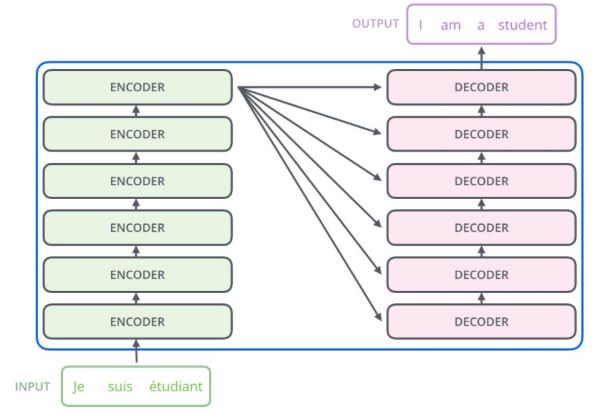
">
<center>Figure1: High level view of a <a href="https://jalammar.github.io/illustrated-transformer/">transformer</a></center>

1. The **encoders** are all identical in structure (yet they do not share weights). Each one is broken down into two sub-layers:

- **Self-Attention Layer**
    - Say the following sentence is an input sentence we want to translate:

      **The animal didn't cross the street because it was too tired.**
      
      What does **"it"** in this sentence refer to? Is it referring to the **street** or to the **animal**? It's a simple question to a human, but not as simple to an algorithm. When such data is fed into a transformer model, the model processes the word **"it"** and the **self-attention layer** allows the model to associate **"it"** with **"animal"**. As each word in the input sequence is processed, **self-attention** looks at other words in the input sequence for clues that can lead to a better encoding for this word.

- **Feed Forward Layer** 
    - The outputs of the self-attention layer are fed to a feed-forward neural network. The exact same feed-forward network is independently applied to each position.

2. The **decoder** has both those layers (**self-attention** & **feed forward layer**), but between them is an **attention layer** (sometimes called **encoder-decoder** attention) that helps the decoder focus on relevant parts of the input sentence.

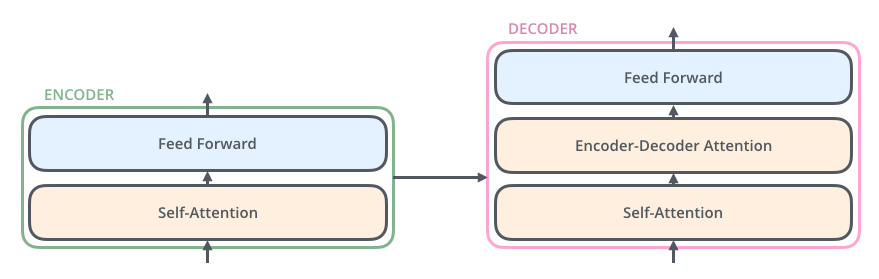

<center>Figure2: Different types of layers in encoder and decoder component of a <a href="https://jalammar.github.io/illustrated-transformer/">transformer</a></center>

To get a more detailed explanation on **different forms of attention** visit [this](https://towardsdatascience.com/attention-and-its-different-forms-7fc3674d14dc) page. Also there is a great blog post on [Visualizing attention in machine translation model](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/) that can help in understanding the attention mechanism in a better way. 

An **“annotated”** [[3]](#References) version of the paper is also present in the form of a line-by-line implementation of the transformer architecture.

# Prerequisites

- Inferencing workflows for pretrained text models of `arcgis.learn.text` submodule is based on [Hugging Face Transformers](https://huggingface.co/transformers/v3.0.2/index.html) library. 
- Refer to the section [Install deep learning dependencies of arcgis.learn module](https://developers.arcgis.com/python/guide/install-and-set-up/#Install-deep-learning-dependencies) for detailed explanation about deep learning dependencies.
- **Choosing a pretrained model**: Depending on the task and the language of the input text, user might need to choose an appropriate transformer backbone to generate desired inference. This [link](https://huggingface.co/models) lists out all the pretrained models offered by [Hugging Face Transformers](https://huggingface.co/transformers/v3.0.2/index.html) library.

# Inference only models

The `arcgis.learn.text` submodule offers the following models pretrained on unstructured text:
- **ZeroShotClassifier**
- **QuestionAnswering**
- **TextSummarizer**
- **TextTranslator**
- **TextGenerator**
- **FillMask**

These models can be imported using the below command

In [1]:
from arcgis.learn.text import ZeroShotClassifier, QuestionAnswering, TextSummarizer, \
                            TextTranslator, TextGenerator, FillMask

## ZeroShotClassifier

[Zero-shot learning](https://towardsdatascience.com/applications-of-zero-shot-learning-f65bb232963f) is a specific area of machine learning where we want the model to classify data based on very few or even no training example. In **Zero-shot learning** the classes covered in the training data and the classes we wish to classify are completely different. 

The **ZeroShotClassifier** model of `arcgis.learn.text` submodule **classifies an input sequence from a list of candidate labels**. The transformer model is trained on the task of **Natural Language Inference (NLI)**, which takes in two sequences and determines whether they contradict each other, entail each other, or neither. 

The model assumes by default that only one of the candidate labels is true, and returns a list of scores for each label which add up to 1. Visit [this link](https://huggingface.co/models?pipeline_tag=zero-shot-classification) to learn more about the available models for **zero-shot-classification task**. 

The command below creates a model object by calling the `ZeroShotClassifier` class.

In [2]:
classifier = ZeroShotClassifier()

A sample code for performing **single-label classification** task.

In [3]:
sequence = "Who are you voting for in 2020?"
candidate_labels = ["politics", "public health", "economics"]

classifier.predict(sequence, candidate_labels)

[{'sequence': 'Who are you voting for in 2020?',
  'labels': ['politics', 'economics', 'public health'],
  'scores': [0.972518801689148, 0.014584126882255077, 0.012897057458758354]}]

For **multi-label classification**, we simply need to pass `multi_class=True` in the `predict()` method of the model. The resulting per label scores for multi-label classification are independent probabilities and fall in the (0, 1) range.

In [4]:
sequence_list = [
    "TAKE THIS MAP DOWN! YOU DO NOT OWN THIS MAP PROJECT OR DATA!",
    "This imagery was great but is not available now"
]

candidate_labels = ["toxic", "severe_toxic", "threat", "insult", "identity_hate"]

from pprint import pprint
pprint(classifier.predict(sequence_list, candidate_labels, multi_class=True))

[{'labels': ['threat', 'insult', 'toxic', 'severe_toxic', 'identity_hate'],
  'scores': [0.9951153993606567,
             0.9661784768104553,
             0.9028339982032776,
             0.7790991067886353,
             0.16090862452983856],
  'sequence': 'TAKE THIS MAP DOWN! YOU DO NOT OWN THIS MAP PROJECT OR DATA!'},
 {'labels': ['threat', 'identity_hate', 'insult', 'severe_toxic', 'toxic'],
  'scores': [0.11222238838672638,
             0.04374469816684723,
             0.00017427862621843815,
             9.843543375609443e-05,
             4.655999146052636e-05],
  'sequence': 'This imagery was great but is not available now'}]


The **ZeroShotClassifier** model has been fine-tuned on [XNLI](https://cims.nyu.edu/~sbowman/xnli/) corpus which includes 15 languages: Arabic, Bulgarian, Chinese, English, French, German, Greek, Hindi, Russian, Spanish, Swahili, Thai, Turkish, Urdu, and Vietnamese. So this model can be used to classify **multi-lingual** text as well. 

Below example shows how this model can be used to classify an input sequence written in Spanish language. 

In [5]:
# Classification on spanish data

sequence = "¿A quién vas a votar en 2020?" # translation: "Who are you voting for in 2020?"
candidate_labels = ["Europa", "salud pública", "política"] # ["Europe", "public health", "politics"]

classifier.predict(sequence, candidate_labels)

[{'sequence': '¿A quién vas a votar en 2020?',
  'labels': ['política', 'salud pública', 'Europa'],
  'scores': [0.7787874341011047, 0.14989280700683594, 0.07131969183683395]}]

This model can be used with any combination of languages. For example, we can classify a Russian sentence with English candidate labels:

In [6]:
# Russian with english candidate labels

sequence = "За кого вы голосуете в 2020 году?" # translation: "Who are you voting for in 2020?"
candidate_labels = ["economics", "public health", "politics"]

classifier.predict(sequence, candidate_labels)

[{'sequence': 'За кого вы голосуете в 2020 году?',
  'labels': ['politics', 'public health', 'economics'],
  'scores': [0.5152668356895447, 0.2594522535800934, 0.22528085112571716]}]

## QuestionAnswering

**QuestionAnswering** model can be used to extract the answers for an input question from a given context. The model has been fine-tuned on a question answering task like [SQuAD](https://rajpurkar.github.io/SQuAD-explorer/). SQuAD belongs to a subdivision of **question-answering** system known as [extractive question-answering](https://medium.com/deepset-ai/going-beyond-squad-part-1-question-answering-in-different-languages-8eac6cf56f21#:~:text=SQuAD%20belongs%20to%20a%20subdivision,referred%20to%20as%20reading%20comprehension.&text=When%20an%20extractive%20QA%20system,the%20question%20(see%20diagram).), also referred to as reading comprehension. Its training data is formed from triples of question, passage and answer. When an **extractive question-answering** system is presented a question and a passage, it is tasked with returning the string sequence from the passage which answers the question. 

Visit [this link](https://huggingface.co/models?pipeline_tag=question-answering) to learn more about the available models for **question-answering** task. 

Run the below command to instantiate a model object.

In [7]:
model = QuestionAnswering()

A sample code to **extract answers** from a given context for a list of questions. 

In [8]:
context = r"""
The arcgis.learn module includes PointCNN model to efficiently classify and segment points from a point cloud dataset. 
Point cloud datasets are typically collected using Lidar sensors ( light detection and ranging ) – an optical 
remote-sensing technique that uses laser light to densely sample the surface of the earth, producing highly 
accurate x, y, and z measurements. These Lidar sensor produced points, once post-processed and spatially 
organized are referred to as a 'Point cloud' and are typically collected using terrestrial (both mobile or static) 
and airborne Lidar.
"""

question_list = ["What is PointCNN?", "How is Point cloud dataset collected?", "What is Lidar?"]

model.get_answer(question_list, context=context)

[{'question': 'What is PointCNN?',
  'answer': 'to efficiently classify and segment points from a point cloud dataset.',
  'score': 0.43700891733169556},
 {'question': 'How is Point cloud dataset collected?',
  'answer': 'Lidar sensors',
  'score': 0.3490387797355652},
 {'question': 'What is Lidar?',
  'answer': 'light detection and ranging',
  'score': 0.8532344102859497}]

### Choosing a different backbone than the default

The default backbones offered by **Inference only Text Models** of the `arcgis.learn.text` submodule may not be suitable for all the use-cases that a user might want to solve. In this case, the user has the option to supply the appropriate transformer model depending on his/her use-case by visiting the model zoo for the given **task** at hand. The `arcgis.learn.text` submodule offers inference only models for 6 different **Natural Language Processing (NLP)** tasks. These tasks are **Classification**, **Summarization**, **Machine Translation**, **Masked Language Modeling** or **Fill Mask**, **Text Generation**, and **Question Answering**

Let's pick a use-case where we want to perform the **question-answering** task on text written in **French** language. As mentioned before the **QuestionAnswering** model of the `arcgis.learn.text` submodule can be used to extract the answers for an input question from a given context. To know more about the available transformer models for the **question-answering** task, one can visit [this link](https://huggingface.co/models?pipeline_tag=question-answering). 

The page lists out 300+ models that are finetuned on a **question-answering** task. A user can filter out the models based on various search criteria such as **DataSets**, **Languages**, **Libraries** etc. We are interested in models that can work with **French** text. The model zoo offers models like `fmikaelian/camembert-base-fquad`, `illuin/camembert-base-fquad` etc. that are finetuned for **question-answering** task in **French** language.

A sample code to extract answers from a given context for an input question written in **French** language.

In [9]:
french_qa_model = QuestionAnswering("fmikaelian/camembert-base-fquad")

In [10]:
question = "Qui était Claude Monet?" # translation: "Who was Claude Monet?"

# translation: "Claude Monet, born November 14, 1840 in Paris and died December 5, 1926 in Giverny,
#               was a French painter and one of the founders of Impressionism."
context = r"""
Claude Monet, né le 14 novembre 1840 à Paris et mort le 5 décembre 1926 à Giverny,
était un peintre français et l'un des fondateurs de l'impressionnisme.
"""

model.get_answer(question, context=context, show_progress=False)

[{'question': 'Qui était Claude Monet?',
  'answer': 'un peintre français',
  'score': 0.02561291679739952}]

The answer **'un peintre français'** translates to **'a french painter'** which is the answer to the question presented to the model. Here we have demonstrated how a user can select an existing transformer model finetuned on a **question-answering** and use the **QuestionAnswering** model to solve a use-case. Similar steps can be followed for other inference only models offered by the `arcgis.learn.text` submodule.

## TextSummarizer

Text summarization [[4]](#References) refers to a technique of shortening long pieces of text. The intent is to create a coherent and concise sequence of text keeping only the main points outlined in the input sentence or paragraph. It's a common problem in **Natural Language Processing (NLP)** domain. Machine learning models are usually trained on documents to distill the useful information before outputting the required summarized texts.

The **TextSummarizer** model can be used generate summary for a given text. These models have been fine-tuned on **summarization** task. Visit [this link](https://huggingface.co/models?pipeline_tag=summarization) to learn more about the available models for **summarization** task.

Sample code to instantiate the model object and summarize a given text.

In [11]:
summarizer = TextSummarizer()

In [12]:
summary_text = """
This deep learning model is used to extract building footprints from high resolution (30-50 cm) satellite imagery. 
Building footprint layers are useful in preparing base maps and analysis workflows for urban planning and development, 
insurance, taxation, change detection, infrastructure planning and a variety of other applications.
Digitizing building footprints from imagery is a time consuming task and is commonly done by digitizing features 
manually. Deep learning models have a high capacity to learn these complex workflow semantics and can produce 
superior results. Use this deep learning model to automate this process and reduce the time and effort required 
for acquiring building footprints.
"""

summarizer.summarize(summary_text, max_length=100)

[{'summary_text': ' This deep learning model is used to extract building footprints from high resolution (30-50 cm) satellite imagery . Building footprint layers are useful in preparing base maps and analysis workflows for urban planning and development, insurance, taxation, change detection, infrastructure planning and a variety of other applications .'}]

## TextTranslator

Machine translation is a sub-field of computational linguistics that deals with the problem of translating an input text or speech from one language to another. The **TextTranslator** model is a class of inference only models that are fine-tuned on a translation task. Visit [this](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/) link to get a more detailed explanation on how machine translation model works. These models uses technique called **Attention**, which highly improves the quality of machine translation systems. **Attention** allows the model to focus on the relevant parts of the input sequence as needed.


<img src="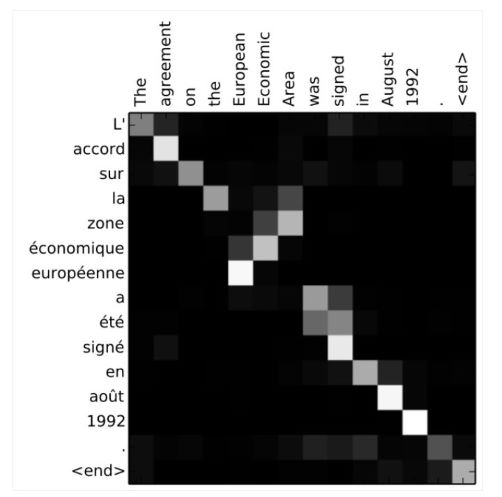 ">

<center>Figure3: The model paid attention correctly when outputing "European Economic Area". In French, the order of these words is reversed ("européenne économique zone") as compared to English.</center>

This [link](https://huggingface.co/models?pipeline_tag=translation&search=Helsinki) lists out the models that allows translation from a source language to one or more target languages. 

Sample code to instantiate the model object and translate a Spanish language text in German language.

In [13]:
translator_german = TextTranslator(target_language="de")

text = """La cobertura terrestre describe la superficie de la tierra. Son útiles para comprender la planificación 
urbana, la gestión de recursos, la detección de cambios, la agricultura y una variedad de otras aplicaciones."""

print(translator_german.translate(text))

[{'translated_text': 'Die Bodenbedeckung beschreibt die Erdoberfläche. Sie sind nützlich für das Verständnis der Stadtplanung, des Ressourcenmanagements, der Erkennung von Veränderungen, der Landwirtschaft und einer Vielzahl anderer Anwendungen.'}]


Sample code for translating English language text to French language.

In [14]:
translator_french = TextTranslator(source_language="en", target_language="fr")
text_list = """Land cover describes the surface of the earth. They are useful for understanding urban planning, 
resource management, change detection, agriculture and a variety of other applications."""

print(translator_french.translate(text_list))

[{'translated_text': "La couverture terrestre décrit la surface de la terre.Elle est utile pour comprendre l'urbanisme, la gestion des ressources, la détection des changements, l'agriculture et une variété d'autres applications."}]


## TextGenerator

**TextGenerator** model can be used to generate sequence of text for a given incomplete text sequence or paragraph. These models are trained with an autoregressive language modeling objective and is therefore powerful at predicting the next token in a sequence. Visit [this link](https://huggingface.co/models?pipeline_tag=text-generation) to learn more about the available models for **text-generation** task.

Sample code to instantiate the model object and using it to generate sequence of text for a given incomplete sentence

In [15]:
text_gen = TextGenerator()

In [16]:
text_list = ["Hundreds of thousands of organizations in virtually every field are using GIS to make maps that"]
pprint(text_gen.generate_text(text_list, num_return_sequences=2, max_length=30))

[[{'generated_text': 'Hundreds of thousands of organizations in virtually '
                     'every field are using GIS to make maps that can help '
                     'them understand their local populations and identify '
                     'potential problems. So'},
  {'generated_text': 'Hundreds of thousands of organizations in virtually '
                     'every field are using GIS to make maps that are easily '
                     'portable to anyone, anytime.\n'
                     '\n'
                     'The GIS'}]]


## FillMask

**FillMask** model can be used to provide suggestion for a missing token/word in a sentence. These models have been trained with a [Masked Language Modeling (MLM)](https://huggingface.co/transformers/task_summary.html#masked-language-modeling) objective, which includes the bi-directional models in the library. Visit [this link](https://huggingface.co/models?pipeline_tag=fill-mask) to learn more about the available models for **fill-mask** task.

Sample usage to get suggestions for a missing word in a sentence

In [17]:
fill_mask = FillMask()

In [18]:
# original text - This deep learning model is used to extract building footprints from high resolution satellite imagery

text_list = ["This deep learning model is used to extract building footprints from high resolution satellite __."]

fill_mask.predict_token(text_list, num_suggestions=4)

[[{'sequence': 'This deep learning model is used to extract building footprints from high resolution satellite imagery.',
   'score': 0.6854187846183777,
   'token_str': 'imagery'},
  {'sequence': 'This deep learning model is used to extract building footprints from high resolution satellite images.',
   'score': 0.24048534035682678,
   'token_str': 'images'},
  {'sequence': 'This deep learning model is used to extract building footprints from high resolution satellite data.',
   'score': 0.010344304144382477,
   'token_str': 'data'},
  {'sequence': 'This deep learning model is used to extract building footprints from high resolution satellite photos.',
   'score': 0.00868541095405817,
   'token_str': 'photos'}]]

# References

[1] [BERT Paper](https://arxiv.org/pdf/1810.04805.pdf)

[2] [Summary of the models](https://huggingface.co/transformers/summary.html)

[3] [The Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html)

[4] [Text Summarization with Machine Learning](https://medium.com/luisfredgs/automatic-text-summarization-with-machine-learning-an-overview-68ded5717a25)